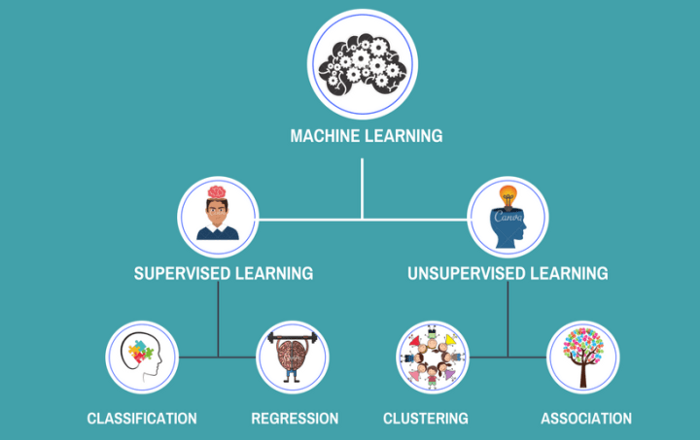

### **Supervised learning**
**Supervised learning** is where you have input variables `(x)` and an output variable `(Y)` and you use an algorithm to learn the mapping function from the input to the output.  
`Y = f(X)`

Supevised learning problems can be further grouped into regression and classification problems.  
· **Classification**: A classification problem is when the output variable is a category, such as “red” or “blue” or “disease” and “no disease”.  
· **Regression**: A regression problem is when the output variable is a real value, such as “Salary” or “Price”.

### **Unsupervised Learning**
Unsupervised learning is where you only have input data (X) and no corresponding output variables.

**The goal for unsupervised learning** is to model the underlying structure or distribution in the data in order to learn more about the data.

Unsupervised learning problems can be further grouped into clustering and association problems.  
· **Clustering**: A clustering problem is where you want to discover the inherent groupings in the data, such as grouping customers by purchasing behavior.  
· **Association**: An association rule learning problem is where you want to discover rules that describe large portions of your data, such as people that buy `X` also tend to buy `Y`.  

Some popular examples of unsupervised learning algorithms are:  
· `k-means` for clustering problems.  
· `Apriori algorithm` for association rule learning problems.

## Selecting Data for Modeling

Your dataset had too many variables to wrap your head around, or even to print out nicely.

To choose variables/columns, we'll need to see a list of all columns in the dataset. That is done with the **columns**\
property of the DataFrame (the bottom line of code below).

In [1]:
import pandas as pd

iowa_file_path = './data/home_data_for_machine_learning/train.csv'
home_data = pd.read_csv(iowa_file_path)

print('Complete')

Complete


In [2]:
home_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Building Your Model

The steps to building and using a model are:  
* **Define**: What type of model will it be? A decision tree? Some other type of model? Some other parameters of the model type are specified too.  
* **Fit**: Capture patterns from provided data. This is the heart of modeling.  
* **Predict**: Just what it sounds like.  
* **Evaluate**: Determine how accurate the model's predictions are.

# Exercises

## Step 1: Specify Prediction Target
Select the target variable, which corresponds to the sales price. Save this to a new variable called `y`. You'll need to print a list of the columns to find the name of the column you need.

In [3]:
# print the list of columns in the dataset to find the name of the prediction target
print(sorted(home_data.columns))

['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation', 'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr', 'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig', 'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning', 'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold', 'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PavedDrive', 'PoolArea', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SalePrice', 'SaleType', 'ScreenPorch', 'Street'

In [4]:
y = home_data['SalePrice']
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

### Step 2: Create X

Create a DataFrame called X holding the predictive features.

In [5]:
feature_names = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']

In [6]:
X = home_data[feature_names]
X.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,8450,2003,856,854,2,3,8
1,9600,1976,1262,0,2,3,6
2,11250,2001,920,866,2,3,6
3,9550,1915,961,756,1,3,7
4,14260,2000,1145,1053,2,4,9


In [7]:
X.describe()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1971.267808,1162.626712,346.992466,1.565068,2.866438,6.517808
std,9981.264932,30.202904,386.587738,436.528436,0.550916,0.815778,1.625393
min,1300.000000,1872.000000,334.000000,0.000000,0.000000,0.000000,2.000000
25%,7553.500000,1954.000000,882.000000,0.000000,1.000000,2.000000,5.000000
50%,9478.500000,1973.000000,1087.000000,0.000000,2.000000,3.000000,6.000000
75%,11601.500000,2000.000000,1391.250000,728.000000,2.000000,3.000000,7.000000
max,215245.000000,2010.000000,4692.000000,2065.000000,3.000000,8.000000,14.000000


### Step 3: Specify and Fit Model
Create a `DecisionTreeRegressor` and save it iowa_model.  
Ensure you've done the relevant import from sklearn to run this command.

Then fit the model you just created using the data in `X` and `y` that you saved above.

> The `fit()` method takes the training data as arguments, which can be one array in the case of unsupervised learning, or two arrays in the case of supervised learning.  
Note that the model is fitted using `X` and `y`, but the object holds no reference to `X` and `y`.

> In a nutshell: `fitting` is equal to `training`.

In [91]:
from sklearn.tree import DecisionTreeRegressor as dtr

#specify the model. 
#For model reproducibility, set a numeric value for random_state when specifying the model
iowa_model = dtr(max_depth=23, random_state=0).fit(X, y)

# fit the iowa_model
# iowa_model.fit(X, y)

In [92]:
print(f"The model training score is, {iowa_model.score(X, y)}")

The model training score is, 0.9999346278367601


### Step 4: Make Predictions
Make predictions with the model's `predict` command using `X` as the data. Save the results to a variable called `predictions`.

In [93]:
predictions = iowa_model.predict(X)

print(predictions)

[208500. 181500. 223500. ... 266500. 142125. 147500.]


In [94]:
home_data.assign(Predict = predictions)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Predict
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,175000.0
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210001,210001.0
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,266500.0
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,142125.0


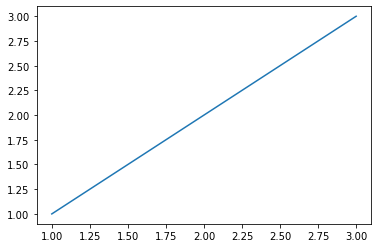

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot([1,2,3], [1,2,3])
plt.show()